<a href="https://colab.research.google.com/github/Zhikharevi/Z.githab.io/blob/master/Python_2_HW_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=792fb410cba6ecbaf9fe2e9601d9d0a3fcbb923f9fa0aff47a4b4fd48327c517
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

In [ ]:
from math import floor

In [ ]:
delivered_orders = orders[orders['order_status'] == 'delivered'][['order_id']]
filtred_items = items[['order_id', 'product_id']]

nan_to_zero_photo_qty = products
nan_to_zero_photo_qty['product_photos_qty'] = products['product_photos_qty'].fillna(0)

filtered_products = products[['product_id', 'product_photos_qty', 'product_description_lenght', 'product_name_lenght']]
delivered_items_product_id = pd.merge(delivered_orders, filtred_items, left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)
product_sell_count = delivered_items_product_id['product_id'].value_counts().to_frame().reset_index().rename(columns={'index': 'product_id', 'product_id': 'sell_counts'})

full_product_sell = pd.merge(product_sell_count, filtered_products, left_on = 'product_id', right_on = 'product_id').drop('product_id', axis = 1).fillna(0)

#считаем среднее для каждой характеристики
sells_to_photos_qty = full_product_sell.groupby(['product_photos_qty'])['sell_counts'].mean()
sells_to_description_lenght = pd.concat([full_product_sell[['sell_counts']], full_product_sell[['product_description_lenght']].applymap(lambda x: floor(x/20)*20)], axis=1).groupby(['product_description_lenght'])['sell_counts'].mean()
sells_to_name_lenght = pd.concat([full_product_sell[['sell_counts']], full_product_sell[['product_name_lenght']].applymap(lambda x: floor(x/5)*5)], axis=1).groupby(['product_name_lenght'])['sell_counts'].mean()

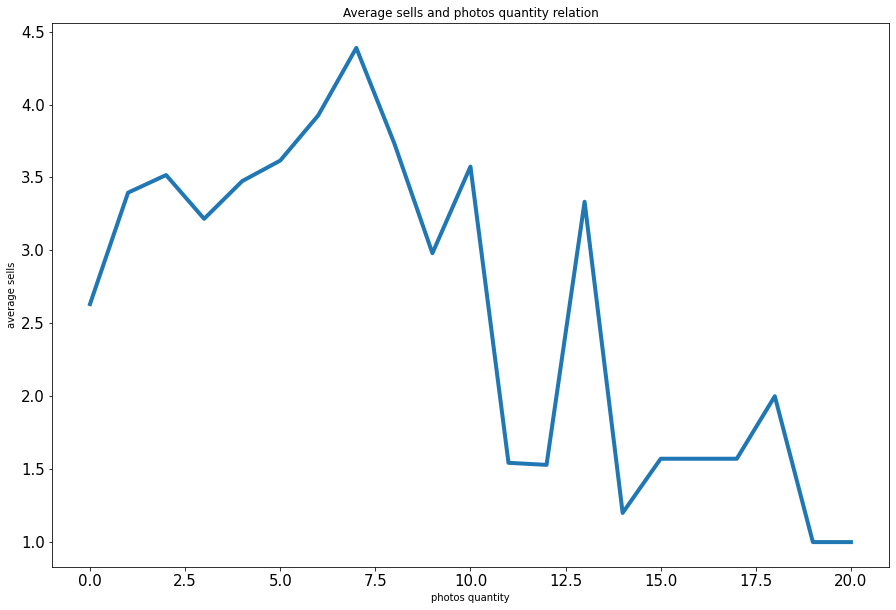

In [ ]:
plot_1a = sells_to_photos_qty.plot(title="Average sells and photos quantity relation",
                                xlabel="photos quantity", ylabel="average sells",
                                fontsize=15, figsize=(15, 10), linewidth=4)

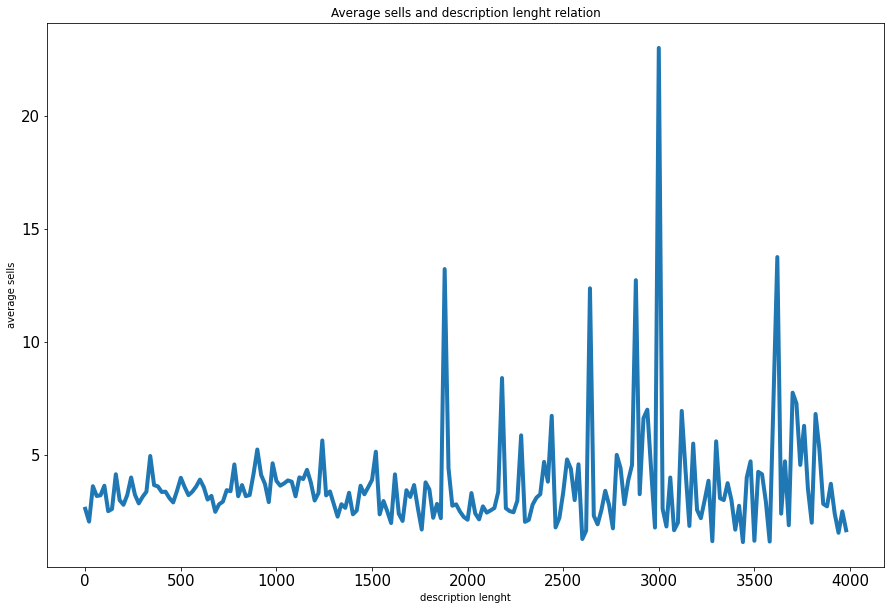

In [ ]:
plot_1b = sells_to_description_lenght.plot(title="Average sells and description lenght relation",
                                xlabel="description lenght", ylabel="average sells",
                                fontsize=15, figsize=(15, 10), linewidth=4)

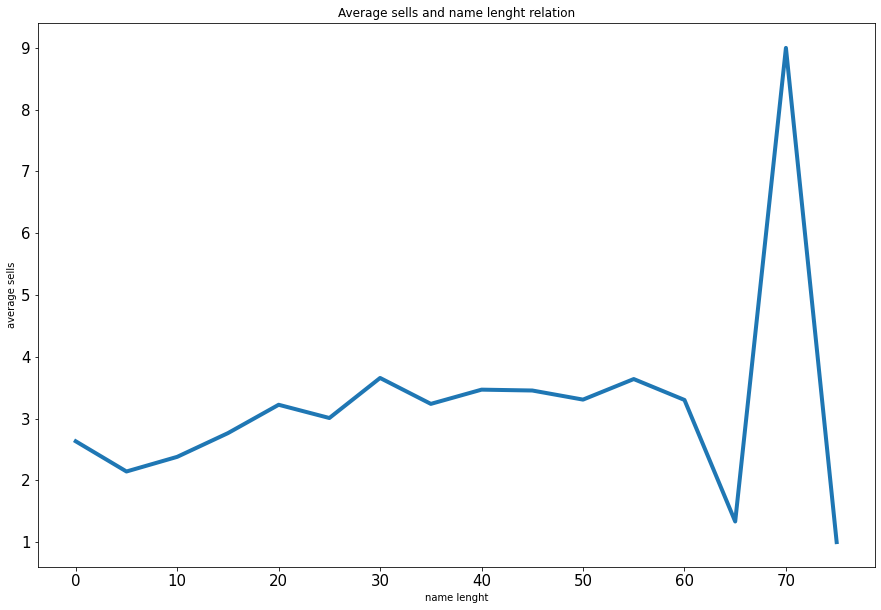

In [ ]:
plot_1c = sells_to_name_lenght.plot(title="Average sells and name lenght relation",
                                xlabel="name lenght", ylabel="average sells",
                                fontsize=15, figsize=(15, 10), linewidth=4)

## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

In [ ]:
delivered_orders = orders[orders['order_status'] == 'delivered'][['order_id']]
filtred_payments = payments[['order_id', 'payment_type', 'payment_value']]
delivered_orders_payments = pd.merge(delivered_orders, filtred_payments, left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)
payment_value_to_type = delivered_orders_payments.groupby(['payment_type'])['payment_value'].mean()

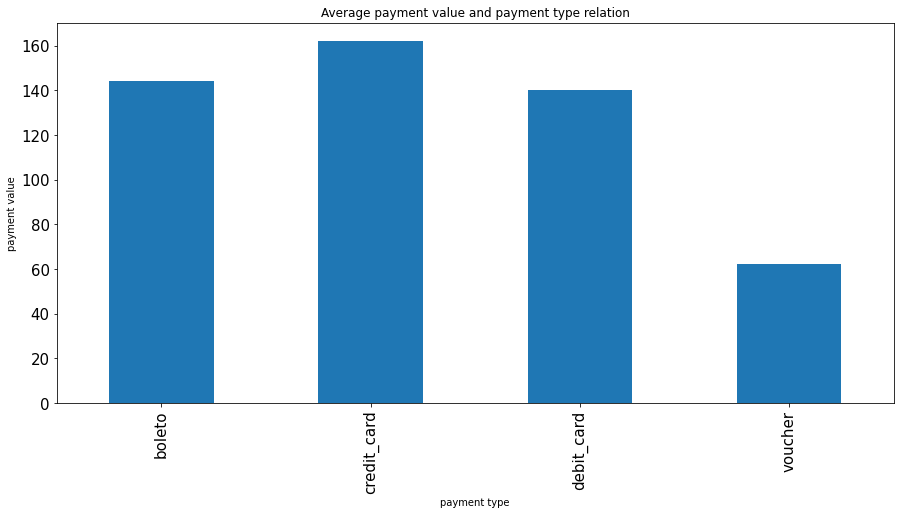

In [ ]:
plot_2 = payment_value_to_type.plot(kind='bar', title="Average payment value and payment type relation",
                                xlabel="payment type", ylabel="payment value",
                                fontsize=15, figsize=(15, 7), linewidth=4)

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

In [ ]:
#исследуем сумму оплаты
tmp_y = items[['order_id', 'price']].groupby(['order_id'])['price'].sum()
tmp_z = items[['order_id', 'freight_value']].groupby(['order_id'])['freight_value'].sum()
tmp_t = pd.merge(tmp_y, tmp_z, left_on = 'order_id', right_on = 'order_id')
tmp_w = payments[['order_id', 'payment_value']].groupby(['order_id'])['payment_value'].sum()
tmp_s = pd.merge(tmp_w, tmp_t, left_on = 'order_id', right_on = 'order_id')
tmp_d = tmp_s.loc[abs(tmp_s['payment_value'] - (tmp_s['price'] + tmp_s['freight_value'])) > 0.1]
tmp_dp = tmp_s.loc[tmp_s['payment_value'] - (tmp_s['price'] + tmp_s['freight_value']) > 0.1]
tmp_dm = tmp_s.loc[(tmp_s['price'] + tmp_s['freight_value']) - tmp_s['payment_value'] > 0.1]
tmp_same = tmp_s.loc[abs(tmp_s['payment_value'] - (tmp_s['price'] + tmp_s['freight_value'])) <= 0.1]
print('Количество заказов, где сумма оплаты: \n - практически равна сумме цен и стоимости доставки по всем товарам заказа:',
      tmp_same.shape[0], '\n - заметно больше суммы цен и стоимости доставки по всем товарам заказа:', tmp_dp.shape[0],
      '\n - заметно меньше суммы цен и стоимости доставки по всем товарам заказа:', tmp_dm.shape[0])


Количество заказов, где сумма оплаты: 
 - практически равна сумме цен и стоимости доставки по всем товарам заказа: 98406 
 - заметно больше суммы цен и стоимости доставки по всем товарам заказа: 241 
 - заметно меньше суммы цен и стоимости доставки по всем товарам заказа: 18


Таким образом, как правило сумма оплаты есть сумма цен и стоимости доставки по всем товарам заказа.

In [ ]:
#ищем баги
pi_null = payments.loc[payments['payment_installments'] == 0]
print(pi_null.shape[0])

2


Возможные варианты багов:
- где-то оплата превышает сумму стоимости и доставки
- где-то оплата меньше суммы стоимости и доставки
- у двух заказов число платежей 0, несмотря на то, что они доставлены

Самым существенным здесь выглядит наличие доставленных оплаченных заказов без платежей – явно ошибка.
Лучше их отбросить из рассмотрения, тем более их всего два.

In [ ]:
delivered_orders = orders[orders['order_status'] == 'delivered'][['order_id']]
filtred_payments = payments[['order_id', 'payment_installments', 'payment_value']]
filtred_payments = filtred_payments.loc[filtred_payments['payment_installments'] > 0]
delivered_orders_payments = pd.merge(delivered_orders, filtred_payments, left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)
payment_value_to_installments = delivered_orders_payments.groupby(['payment_installments'])['payment_value'].mean()

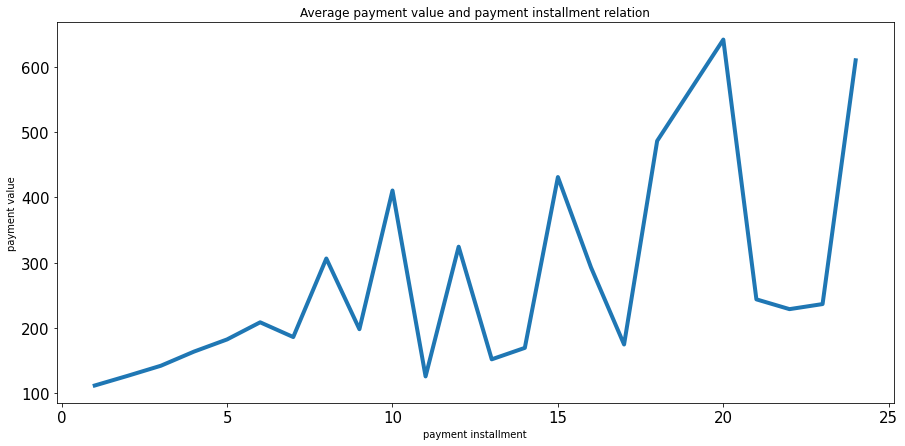

In [ ]:
plot_3 = payment_value_to_installments.plot(title="Average payment value and payment installment relation",
                                xlabel="payment installment", ylabel="payment value",
                                fontsize=15, figsize=(15, 7), linewidth=4)

Возможные выводы: заметны скачки на круглых числах (10, 15, 20) и кратных шести (6, 12, 18, 24).
Скорее всего это стандартные сроки для рассрочки (полгода, год, полтора, два).
10, 15, 20 – возможно тоже количество месяцев, или просто установленное в договоре количество платежей.
Так что связь есть, но она не линейная и зависит от кратности "хорошим" числам. И естественно, что при этом длительность рассрочки растёт вместе с суммой оплаты)

С другой стороны, при количестве платежей превышающем десять резко уменьшается выборка (что видно на графиках ниже), и для этой части эти выводы ненадёжны.

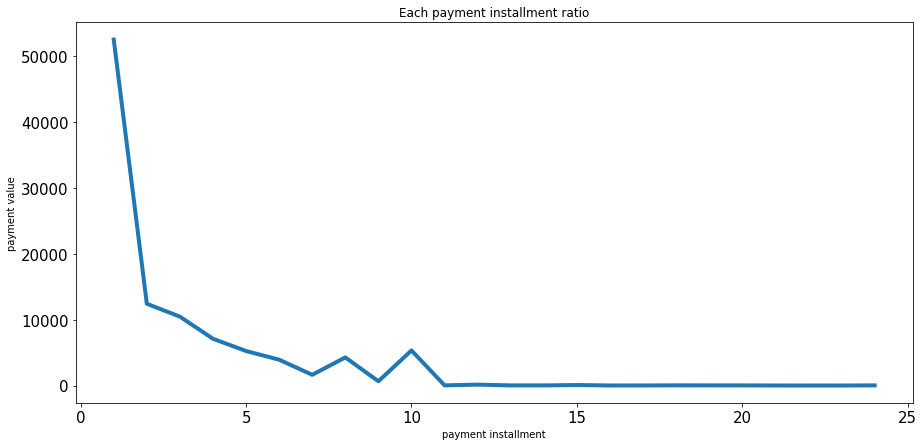

In [ ]:
count_by_payment_installments = filtred_payments.groupby(['payment_installments'])['payment_value'].count()
plot_3extra = count_by_payment_installments.plot(title="Amount of orders by payment installments",
                                xlabel="payment installment", ylabel="order count",
                                fontsize=15, figsize=(15, 7), linewidth=4)

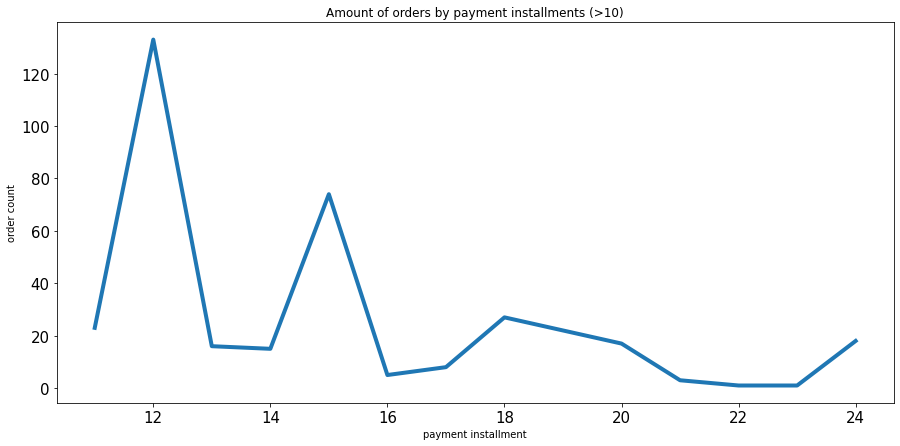

In [ ]:
more_than_ten_installments = filtred_payments.loc[filtred_payments['payment_installments'] > 10].groupby(['payment_installments'])['payment_value'].count()
plot_3extra = more_than_ten_installments.plot(title="Amount of orders by payment installments (>10)",
                                xlabel="payment installment", ylabel="order count",
                                fontsize=15, figsize=(15, 7), linewidth=4)

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [ ]:
delivered_orders = orders[orders['order_status'] == 'delivered'][['order_id', 'customer_id']]
filtred_customers = customers[['customer_id', 'customer_state']]
filtred_items = items[['order_id', 'price', 'freight_value']]
order_to_customer = pd.merge(delivered_orders, filtred_customers, left_on = 'customer_id', right_on = 'customer_id').drop('customer_id', axis = 1)
delivered_orders_price = pd.merge(delivered_orders[['order_id']], filtred_items, left_on = 'order_id', right_on = 'order_id').groupby(['order_id']).sum().reset_index()
delivered_orders_price_by_state = pd.merge(delivered_orders_price, order_to_customer, left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)

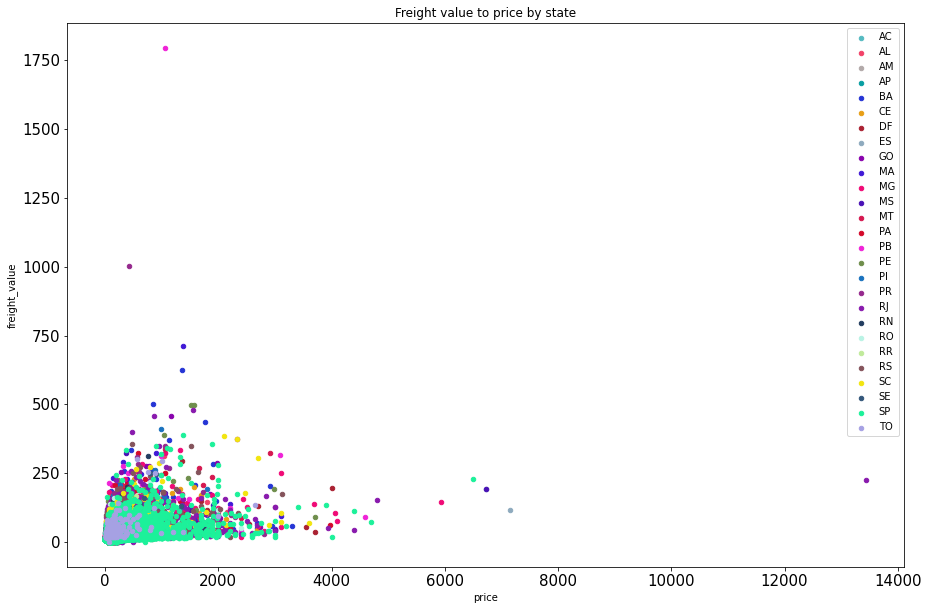

In [ ]:
from random import randint

state_list = delivered_orders_price_by_state['customer_state'].unique().tolist()

colors = {}

for i in range(len(state_list)):
    colors[state_list[i]] = '#%06X' % randint(0, 0xFFFFFF)

fig, ax = plt.subplots(figsize=(15, 10))

grouped = delivered_orders_price_by_state.groupby('customer_state')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='price', y='freight_value',
               xlabel='price', ylabel='freight value', title='Freight value to price by state', label=key, c=colors[key], fontsize=15)
plt.show()

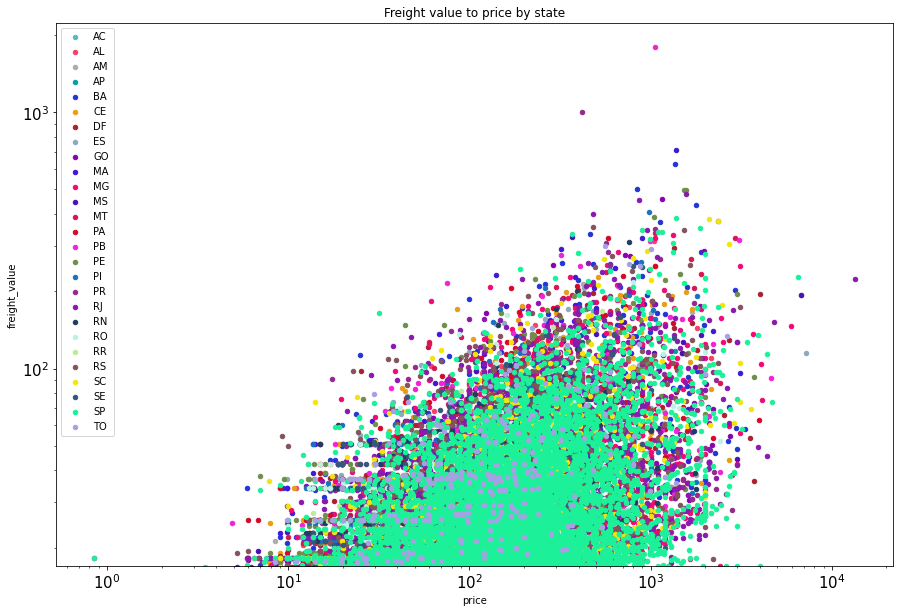

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

grouped = delivered_orders_price_by_state.groupby('customer_state')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='price', y='freight_value',
               xlabel='price', ylabel='freight value', title='Freight value to price by state', label=key, c=colors[key], fontsize=15, loglog=True)
plt.show()

Для исследования по штатам не очень удобно, разобъём на девять частей:

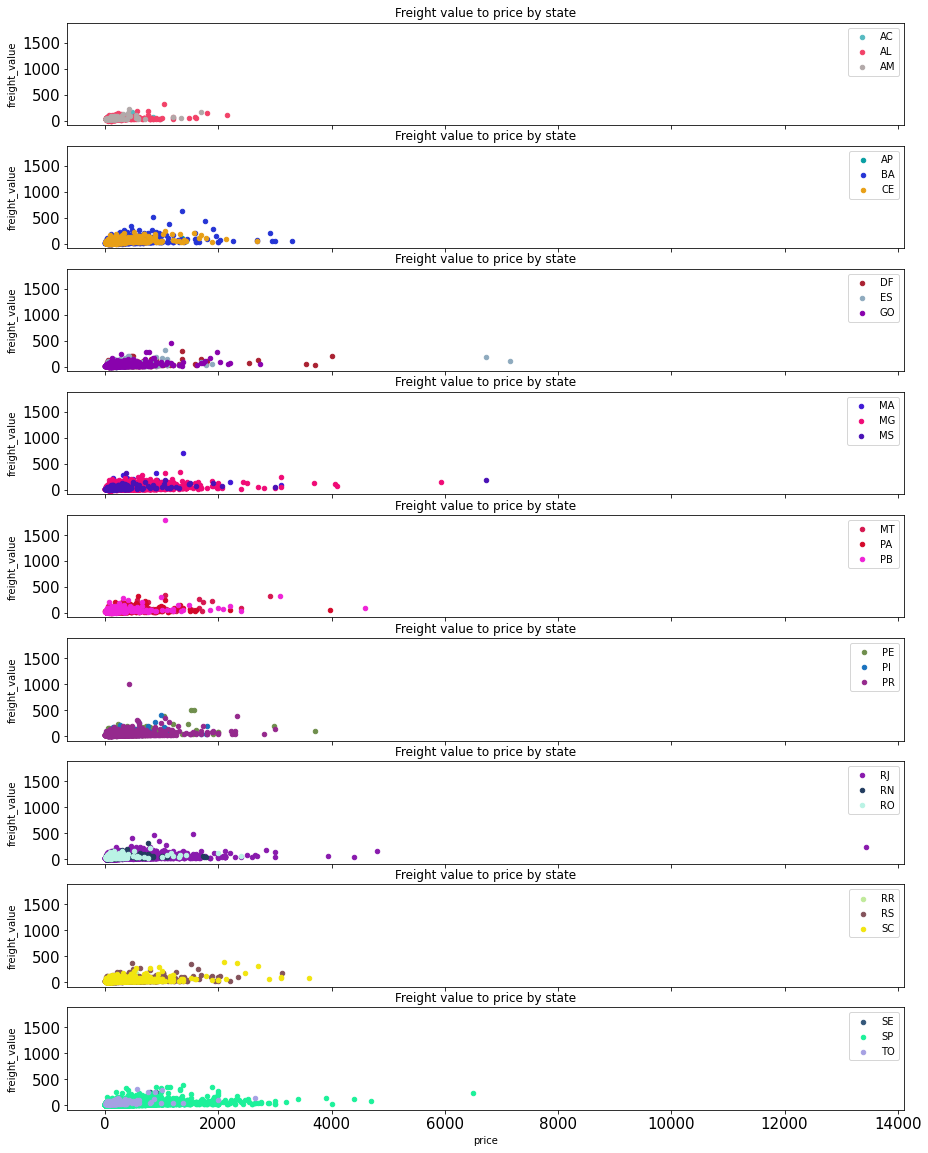

In [ ]:
fig, axs = plt.subplots(9, sharex=True, sharey=True, figsize=(15, 20))

grouped = delivered_orders_price_by_state.groupby('customer_state')
i = 0
for key, group in grouped:
    group.plot(ax=axs[i//3], kind='scatter', x='price', y='freight_value',
               xlabel='price', ylabel='freight value', title='Freight value to price by state', label=key, c=colors[key], fontsize=15)
    i += 1
plt.show()

Выводы: по штатам кратко описываемой или существенной зависимости не наблюдается, а вот в целом можно заметить, что с ростом цены растёт максимальная стоимость доставки, причём практически не более чем линейно (может быть даже логарифмически). Также практически линейно (но с очень маленьким коэффициентом) растёт и минимальная стоимость доставки.

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

In [ ]:
delivered_orders_with_ts = orders[orders['order_status'] == 'delivered'][['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
delivered_orders_with_ts['time_status_late'] = delivered_orders_with_ts['order_delivered_customer_date'] > delivered_orders_with_ts['order_estimated_delivery_date']
filtred_reviews = reviews[['order_id', 'review_score']]
review_to_time_status = pd.merge(filtred_reviews, delivered_orders_with_ts[['order_id', 'time_status_late']], left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)
review_to_late = review_to_time_status.loc[review_to_time_status['time_status_late'] == True]
review_to_ontime = review_to_time_status.loc[review_to_time_status['time_status_late'] == False]

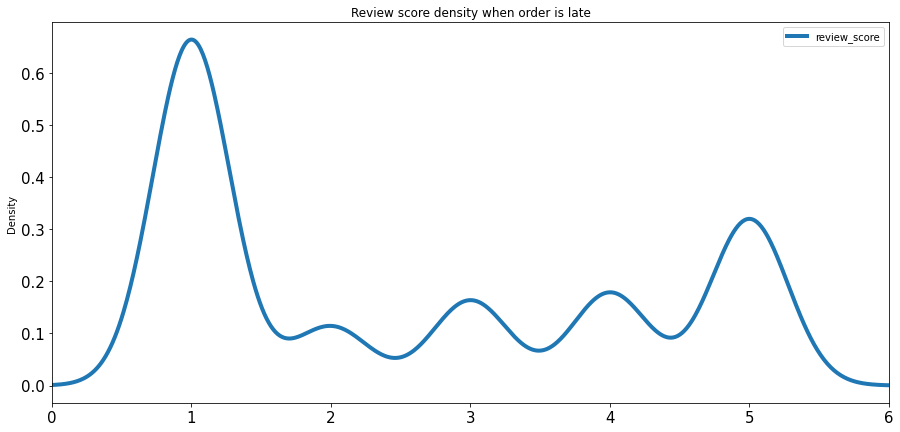

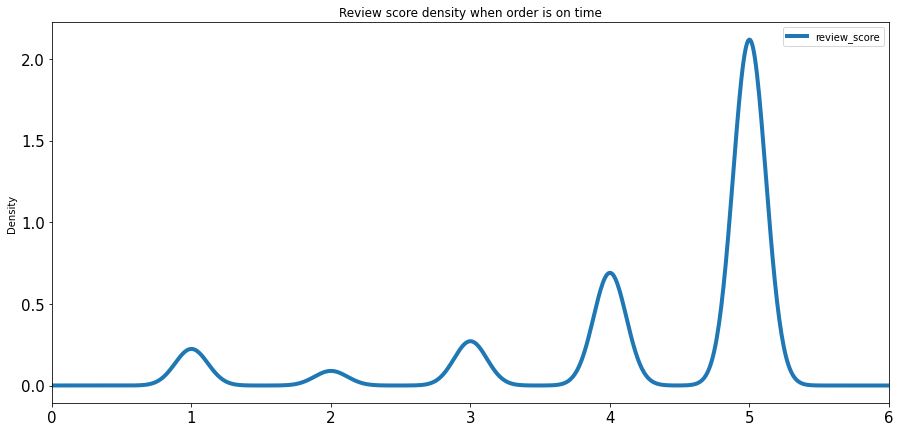

In [ ]:
plot_5a = review_to_late.plot(kind='kde', title="Review score density when order is late",
                                xlabel="review score",
                                fontsize=15, figsize=(15, 7), linewidth=4, xlim=(0, 6))
plot_5b = review_to_ontime.plot(kind='kde', title="Review score density when order is on time",
                                xlabel="review score",
                                fontsize=15, figsize=(15, 7), linewidth=4, xlim=(0, 6))

In [ ]:
print ("Средняя оценка доставленных вовремя заказов:", review_to_ontime['review_score'].mean(),
      "\nСредняя оценка запоздавших заказов:", review_to_late['review_score'].mean(),
      "\nРазница:", review_to_ontime['review_score'].mean()-review_to_late['review_score'].mean())

Средняя оценка доставленных вовремя заказов: 4.293736817766549 
Средняя оценка запоздавших заказов: 2.5664935064935066 
Разница: 1.727243311273042


Исходя из полученного, факт опоздания влияет на оценку кардинально:
- без опоздания самая часто встречающаяся оценка --  5
- при опоздании самая часто встречающаяся оценка --  1, при этом вторая по частоте всё равно 5
- при опоздании распределение оценок более равномерное, чем без него
- при любом случае 2 наименее популярная оценка
- разница средних оценок составляет более 1.72 балла

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [ ]:
print(customers.shape)
print(location.shape)
print(items.shape)
print(payments.shape)
print(reviews.shape)
print(orders.shape)
print(products.shape)
print(translation.shape)
print(sellers.shape)

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(99224, 7)
(99441, 8)
(32951, 9)
(71, 2)
(3095, 4)


In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
from datetime import datetime

In [ ]:
delivered_orders_time = orders[orders['order_status'] == 'delivered'][['order_id', 'order_delivered_customer_date', 'order_purchase_timestamp', 'customer_id']]

delivered_orders_time['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_time['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
delivered_orders_time['order_delivered_customer_date'] = pd.to_datetime(delivered_orders_time['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

delivered_orders_time['time_distance'] = delivered_orders_time['order_delivered_customer_date'] - delivered_orders_time['order_purchase_timestamp']

delivered_orders_time['time_distance'] = delivered_orders_time['time_distance'].apply(lambda x: x.days)

delivered_orders_time = delivered_orders_time.drop('order_delivered_customer_date', axis = 1).drop('order_purchase_timestamp', axis = 1)

filtred_customers = customers[['customer_id', 'customer_state']]
filtred_items = items[['order_id', 'seller_id', 'price']]
filtred_sellers = sellers[['seller_id', 'seller_state']]

order_to_customer = pd.merge(delivered_orders_time, filtred_customers, left_on = 'customer_id', right_on = 'customer_id').drop('customer_id', axis = 1)
item_to_price = pd.merge(order_to_customer, filtred_items, left_on = 'order_id', right_on = 'order_id').drop('order_id', axis = 1)
seller_to_price = pd.merge(item_to_price, filtred_sellers, left_on = 'seller_id', right_on = 'seller_id').drop('seller_id', axis = 1)

seller_to_price['same_state'] = seller_to_price['customer_state'] == seller_to_price['seller_state']

seller_to_price = seller_to_price.drop('customer_state', axis = 1).drop('seller_state', axis = 1)

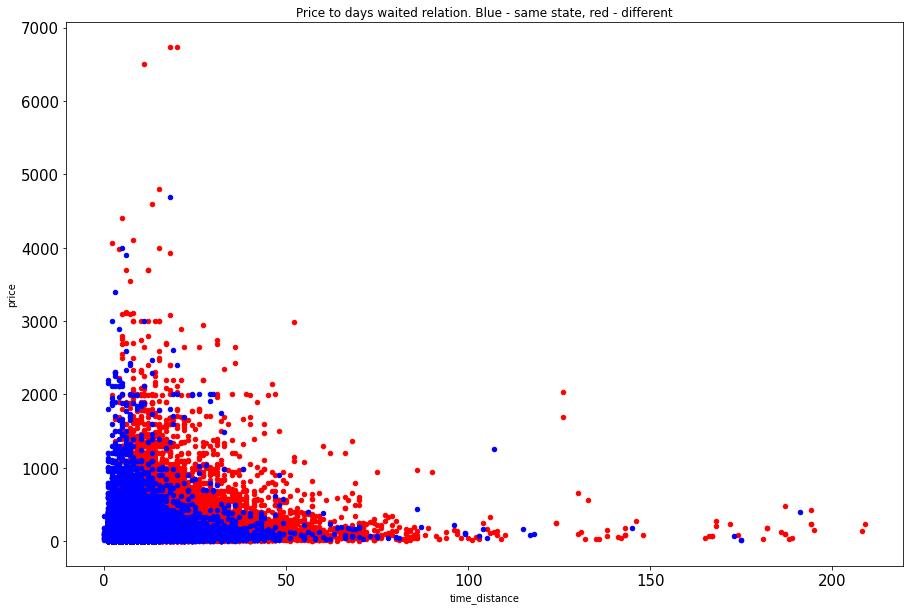

In [ ]:
colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(15, 10))

grouped = seller_to_price.groupby('same_state')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='time_distance', y='price',
               xlabel='days waited', ylabel='price', title='Price to days waited relation. Blue - same state, red - different', c=colors[key], fontsize=15)
plt.show()

Исходя из полученного можно сделать вывод о том, в среднем цена и время ожидания в случае, когда заказчик и продавец из разных штатов, выше, чем когда они из одного.